<a href="https://colab.research.google.com/github/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/blob/main/4_mlp_svm_sol_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación: Multilayer Perceptron y Support Vector Machines

En aprendizaje de máquinas, la clasificación es el problema de identificar a qué clase (de un grupo finito de clases) una observación nueva pertenece, tomando como base un entrenamiento previo sobre un grupo de observaciones donde sí se conocían sus clases correspondientes.

In [1]:
import pandas as pd
import sklearn.linear_model # Algoritmos lineales como el Perceptron
import sklearn.neural_network # Perceptón multicapa
import sklearn.model_selection # Funciones para preprocesar nuestros datos
import sklearn.svm
import sklearn.metrics # Métricas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Perceptrón

<img src='https://grupo.us.es/gtocoma/pid/pid10/RedesNeuronales_archivos/image067.jpg' class="bg-primary mb-1" align="right" width="800"/>

In [2]:
# Cargamos la data
simplest = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/simplest_clase4.csv")
simplest

,x1,x2,y
0,1.812018,1.033985,1
1,-2.627158,-2.016127,0
2,-3.023353,1.481023,1
3,2.800382,-2.410295,0
4,-1.836262,2.381069,1
...,...,...,...
95,-1.370914,3.371058,1
96,3.079352,-2.636511,0
97,-2.769208,-1.464816,0
98,-3.274601,-1.511646,0


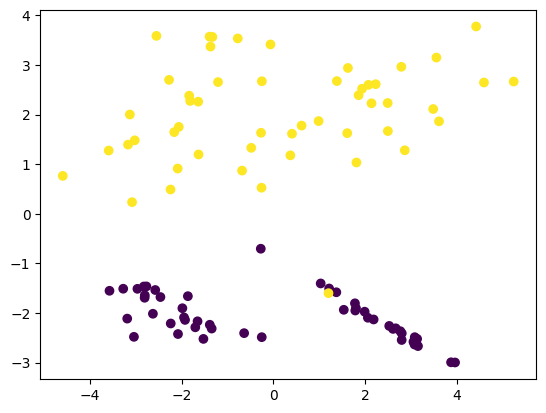

In [3]:
# Graficamos
plt.scatter(simplest.x1, simplest.x2, c = simplest.y) # c = simplest.y, pinta los puntos segun la etiqueta

## Preprocesamiento

Para poder evaluar los desempeños de nuestros modelos de la manera más válida posible, se suele dividir nuestro conjunto de datos un en subconjunto de entrenamiento y uno de prueba. El subconjunto de entrenamiento es el único que utilizaremos para entrenar nuestro modelo. El subconjunto de prueba es independiente al de entrenamiento y con este evaluamos las métricas de desempeño de nuestro modelo.

Para fácilemente realizar esta separación utilizamos la función `sklearn.model_selection.train_test_split()`

In [4]:
simplest_features = simplest.iloc[:,:-1] # Seleccionamos sólo las características de nuestro conjunto de datos
simplest_label = simplest.y
simplest_features_train, simplest_features_test, simplest_label_train, simplest_label_test = sklearn.model_selection.train_test_split(
    simplest_features,
    simplest_label,
    test_size=0.33, # Tamaño del conjunto de prueba
    random_state=11 # Bloqueamos el generador de números al azar con una semilla
)


print(f'Tamaño conjunto de train: {simplest_label_train.shape[0]}')
print(f'Tamaño conjunto de test: {simplest_label_test.shape[0]}')

# Proporcion etiquetas por conjunto
print('-'*35)
print(f'Numero de 0 en conjunto de train: {simplest_label_train.value_counts()[0]}')
print(f'Numero de 1 en conjunto de train: {simplest_label_train.value_counts()[1]}')
print('-'*35)
print(f'Numero de 0 en conjunto de test: {simplest_label_test.value_counts()[0]}')
print(f'Numero de 1 en conjunto de test: {simplest_label_test.value_counts()[1]}')

Tamaño conjunto de train: 67
Tamaño conjunto de test: 33
-----------------------------------
Numero de 0 en conjunto de train: 32
Numero de 1 en conjunto de train: 35
-----------------------------------
Numero de 0 en conjunto de test: 17
Numero de 1 en conjunto de test: 16


Text(0.5, 1.0, 'Conjunto de prueba')

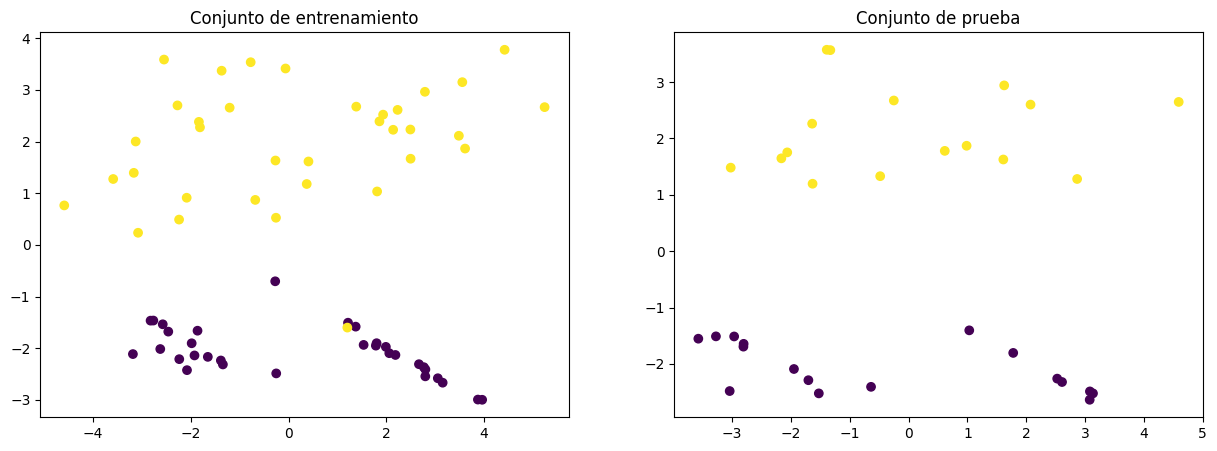

In [5]:
# Graficamos conjunto de train
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].scatter(simplest_features_train.x1, simplest_features_train.x2, c = simplest_label_train)
ax[0].set_title('Conjunto de entrenamiento')
ax[1].scatter(simplest_features_test.x1, simplest_features_test.x2, c = simplest_label_test)
ax[1].set_title('Conjunto de prueba')

## Evaluamos

### Evaluacion conjunto test

Para evaluar el rendimiento de nuestro clasificador, calcularemos algunas métricas de clasificación sobre el subconjunto de entrenamiento utilizando la función `sklearn.metrics.classification_report()`

In [6]:
# Instanciamos nuestro perceptrón
p = sklearn.linear_model.Perceptron()

# Entrenamos nuestro perceptron
p.fit(simplest_features_train, simplest_label_train)

# Evaluamos en el conjunto de prueba
print(sklearn.metrics.classification_report(
    simplest_label_test, # Etiquetas reales del conjunto de prueba
    p.predict(simplest_features_test) # Etiquetas predichas por el modelo
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [10]:
# Para obtener el vector de predicciones, se debe llamar la funcion .predict("valores variables conjunto test")
# El orden del vector, es exactamente al orden de los indicies de los "valores variables conjunto test"
p.predict(simplest_features_test)

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

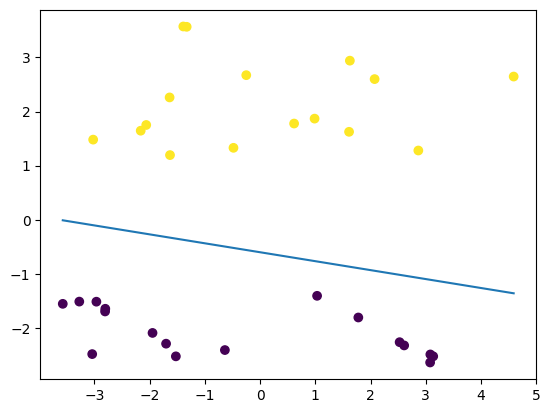

In [11]:
slope = -( p.intercept_ / p.coef_[0][1] ) / ( p.intercept_ / p.coef_[0][0] ) # Pendiente asociada al umbral de clasificación
intercept = -p.intercept_ / p.coef_[0][1] # Intercepto asociado al umbral de clasificación

# Calculemos 2 puntos para trazar una linea asociada al umbral de clasificación
db_x = np.array(
    [simplest_features_test.x1.min(),
    simplest_features_test.x1.max()]
)
db_y = slope * db_x + intercept

plt.scatter(simplest_features_test.x1,simplest_features_test.x2,c = simplest_label_test)
# Graficamos nuestro umbral de clasificación
plt.plot(db_x,db_y)

### Evaluacion conjunto train

In [12]:
# Evaluamos en el conjunto de train
# Label, Prediction
print(sklearn.metrics.classification_report(simplest_label_train, p.predict(simplest_features_train)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.99        35

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



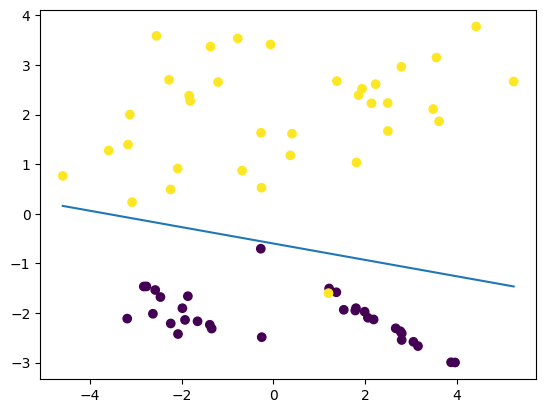

In [13]:
slope = -( p.intercept_ / p.coef_[0][1] ) / ( p.intercept_ / p.coef_[0][0] ) # Pendiente asociada al umbral de clasificación
intercept = -p.intercept_ / p.coef_[0][1] # Intercepto asociado al umbral de clasificación

# Calculemos 2 puntos para trazar una linea asociada al umbral de clasificación
db_x = np.array([simplest_features_train.x1.min(), simplest_features_train.x1.max()])
# Ecuacion de la recta
db_y = slope * db_x + intercept

# Graficamos
plt.scatter(simplest_features_train.x1,simplest_features_train.x2, c = simplest_label_train)
# Graficamos nuestro umbral de clasificación
plt.plot(db_x,db_y)

### ¿Y como se comporta para otra distribución de datos?

In [14]:
simplest_2 = pd.read_csv("https://raw.githubusercontent.com/MaxWesterhout/Sistemas-de-Diagnostico-y-Tratamiento-I/refs/heads/main/data/simplest_2_clase4.csv")
simplest_2

,x1,x2,y
0,-2.445090,3.421906,1
1,4.127251,-3.845370,1
2,0.966846,0.960933,0
3,-4.474783,-3.323893,0
4,2.786059,3.244510,0
...,...,...,...
95,3.950375,3.457849,0
96,2.784031,2.622492,0
97,-2.249013,-2.353313,0
98,-1.749253,-2.589634,0


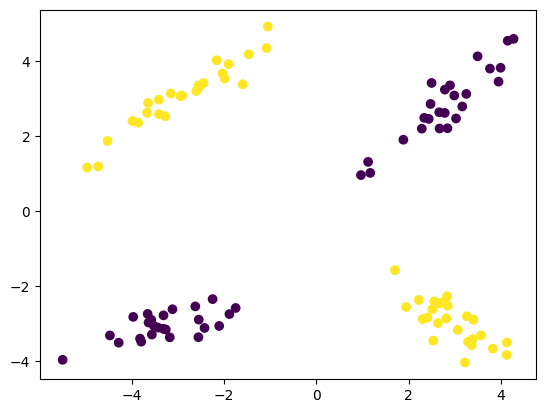

In [15]:
plt.scatter(simplest_2.x1,simplest_2.x2,c = simplest_2.y)

In [16]:
#Preprocesamiento y división de train/test
simplest_2_values = simplest_2.iloc[:,:-1]
simplest_2_label = simplest_2.y
simplest_2_train, simplest_2_test, simplest_2_label_train, simplest_2_label_test = sklearn.model_selection.train_test_split(
    simplest_2_values,
    simplest_2_label,
    test_size=0.33,
    random_state=11)

#Ajustamos a un perceptrón
p1 = sklearn.linear_model.Perceptron()
p1.fit(simplest_2_train,simplest_2_label_train)
#Métricas
print(sklearn.metrics.classification_report(simplest_2_label_test,p1.predict(simplest_2_test)))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.56      0.67      0.61        15

    accuracy                           0.61        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.62      0.61      0.61        33



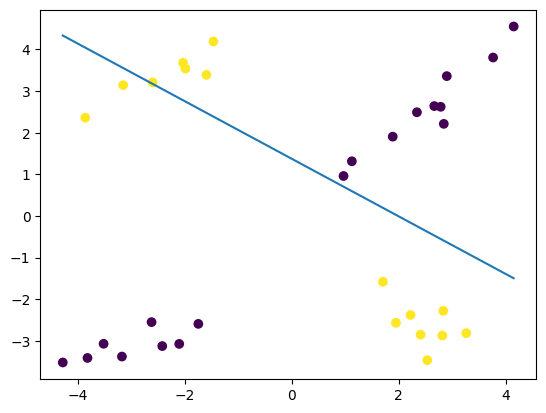

In [17]:
# Visualización
slope = -( p1.intercept_ / p1.coef_[0][1] ) / ( p1.intercept_ / p1.coef_[0][0] )
intercept = -p1.intercept_ / p1.coef_[0][1]

# Curva
db_x = np.array([simplest_2_test.x1.min(),simplest_2_test.x1.max()])
db_y = slope * db_x + intercept

# Graficamos
plt.scatter(simplest_2_test.x1,simplest_2_test.x2,c = simplest_2_label_test)
plt.plot(db_x,db_y)
plt.show()

---
<img src='https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg' class="bg-primary mb-1" align="right" width="1000"/>

Para esta clase usaremos [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), directamente desde las bases de datos almacenadas en Sklearn.

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data, target = load_breast_cancer(as_frame=True, return_X_y=True)
data[data.columns] = MinMaxScaler().fit_transform(data)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [19]:
# Dividimos nuestro conjunto de datos en subconjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    data,
    target,
    test_size=0.33, # Tamaño del conjunto de prueba
    random_state=11 # Bloqueamos el generador de números al azar con una semilla
)

Ajustaremos un único perceptrón para poder separar las clases de nuestros datos.

In [20]:
p = sklearn.linear_model.Perceptron() # Instanciamos nuestro perceptrón
p.fit(
    X_train,
    Y_train
) # Ajustamos el perceptrón con los datos de entrenamiento

Perceptron()

In [21]:
print(sklearn.metrics.classification_report(
    Y_test, # Etiquetas reales del conjunto de prueba
    p.predict(X_test) # Etiquetas predichas por el modelo
))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        67
           1       0.98      0.94      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188



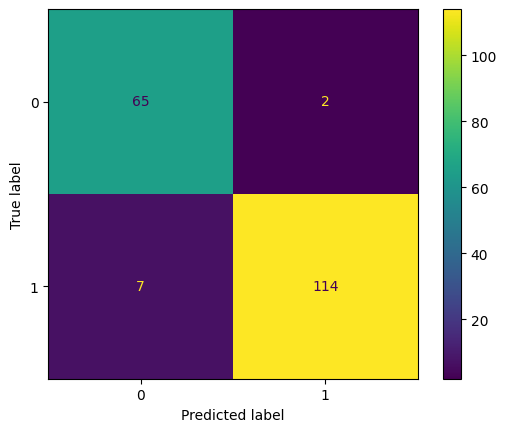

In [22]:
#Veamos la matriz de confusión
cm = sklearn.metrics.confusion_matrix(Y_test,p.predict(X_test))
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Cada celda se lee por lado, ejemplo: Superior derecha, corresponde a los casos en donde la "True label" (etiqueta/clase correcta) era 0 y la predicción fue 0, siendo este caso 65 casos donde ocurrió eso.

In [63]:
# Caso uno quiere checkear exactamente los casos donde el clasificador se equivoco
# Obtenemos las predicciones como vector
Predicciones = list(np.array(p.predict(X_test)))
# El proceso de arriba tiene una complicación para transformar el tipo de datos, por ello esto paso
Predicciones = [int(x) for x in Predicciones]
# Obtenemos en el mismo formato las etiquetas reales
target_list = list(Y_test)

# Vector donde almacenaremos los indices incorrectos
indices_incorrectos = []

# Recorremos el largo de las predicciones
for i in range(len(Predicciones)):
  # En el caso de que sean distintas hay una prediccion incorrecta
  if Predicciones[i] != target_list[i]:
    print(f'El indice/caso incorrecto, corresponde a la fila {i}')
    indices_incorrectos.append(i)

El indice/caso incorrecto, corresponde a la fila 27
El indice/caso incorrecto, corresponde a la fila 67
El indice/caso incorrecto, corresponde a la fila 116
El indice/caso incorrecto, corresponde a la fila 126
El indice/caso incorrecto, corresponde a la fila 132
El indice/caso incorrecto, corresponde a la fila 162
El indice/caso incorrecto, corresponde a la fila 164
El indice/caso incorrecto, corresponde a la fila 166
El indice/caso incorrecto, corresponde a la fila 182


In [65]:
# Podemos observar la data de esos indices
X_test.iloc[indices_incorrectos]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
291,0.377633,0.317552,0.367908,0.230668,0.336643,0.241856,0.139175,0.239513,0.413636,0.180286,...,0.295980,0.377665,0.292295,0.153510,0.397081,0.267495,0.144089,0.511684,0.275379,0.194674
541,0.354442,0.516740,0.359478,0.217561,0.322651,0.317833,0.236410,0.193340,0.410101,0.283277,...,0.294913,0.525320,0.314209,0.153288,0.414911,0.381203,0.322684,0.414089,0.319732,0.309983
456,0.220029,0.662158,0.214774,0.115207,0.369595,0.203546,0.167760,0.100249,0.373232,0.246420,...,0.184632,0.714019,0.177449,0.084202,0.458496,0.170572,0.233466,0.234880,0.260004,0.112554
413,0.379052,0.419344,0.371363,0.233383,0.293581,0.254954,0.160708,0.192644,0.446465,0.193134,...,0.314123,0.520522,0.297774,0.167592,0.241234,0.298057,0.248722,0.449485,0.315001,0.245769
455,0.302854,0.710517,0.294036,0.175483,0.359484,0.168333,0.066050,0.162227,0.159091,0.214827,...,0.253291,0.788646,0.230490,0.127900,0.303969,0.111389,0.055935,0.266770,0.124384,0.142398
135,0.273984,0.431518,0.262110,0.153892,0.342331,0.117263,0.110380,0.134394,0.265152,0.225147,...,0.233369,0.569030,0.207331,0.115120,0.467080,0.121285,0.173882,0.320653,0.249162,0.168110
542,0.367220,0.531282,0.351807,0.222736,0.271915,0.161831,0.096181,0.150447,0.393939,0.144061,...,0.305229,0.540245,0.283829,0.157589,0.230007,0.107023,0.128674,0.376289,0.228070,0.095238
297,0.226182,0.285086,0.215673,0.121994,0.424754,0.121956,0.062910,0.174702,0.282323,0.271904,...,0.193170,0.303038,0.172768,0.090543,0.280856,0.050887,0.048882,0.246048,0.081411,0.092549
128,0.384259,0.225905,0.385530,0.225239,0.563059,0.494816,0.266635,0.424155,0.475253,0.309815,...,0.291000,0.168177,0.276358,0.141909,0.445288,0.253233,0.156550,0.489003,0.202050,0.149219


Exploremos los parámetros ajustados de nuestro perceptrón

In [66]:
#Aporte de cada parámetro
df = pd.DataFrame({"name":p.feature_names_in_, "value":p.coef_[0]})
df.sort_values(by = "value")

,name,value
21,worst texture,-4.918443
10,radius error,-4.642260
7,mean concave points,-4.331610
27,worst concave points,-4.260687
28,worst symmetry,-4.078849
20,worst radius,-3.976521
12,perimeter error,-3.569759
22,worst perimeter,-3.556651
23,worst area,-3.503416
24,worst smoothness,-3.454666


## Actividad 1

Los resultados son considerablemente buenos, sin embargo. ¿Se puede añadir más perceptrones?¿Se mejora los resultados?

A continuación trabajaremos con un clasificador de multiples capas de perceptrones (*Multi-layer Perceptron classifier* o [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)), el cual nos permitirá adaptar la cantidad de perceptrones, capas, función de activación y otros parámetros.

Algo interesante: [MLP Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.38047&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)



              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



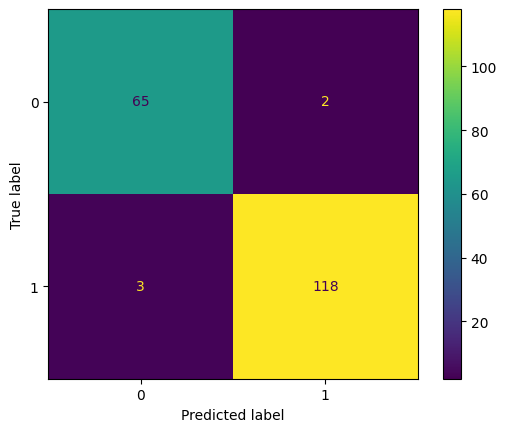

In [67]:
# TODO: Código para perceptrones múltiples para clasificar.
# HINT: Documentación del perceptrón multicapa https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

#Instanciar MLP
mlp = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes = (100,),
    activation = 'relu',
    max_iter = 2000,
    random_state = 11,
    solver = 'adam',
    n_iter_no_change = 10
)

#Ajustar a los datos
mlp.fit(
    X_train,
    Y_train
)

#Métricas de evaluación
print(sklearn.metrics.classification_report(Y_test,mlp.predict(X_test)))
cm = sklearn.metrics.confusion_matrix(Y_test,mlp.predict(X_test))
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Support Vector Machines

Ajustamos un modelo de SVM lineal sobre nuestros datos `simplest_2`

In [68]:
# Instanciamos nuestra svm lineal
svm = sklearn.svm.SVC(
    kernel="linear" # utlizamos un kernel lineal
    )

# Ajustamos el perceptrón con los datos de entrenamiento
svm.fit(
    simplest_2_train,
    simplest_2_label_train
)

#Métricas de evaluación
print(sklearn.metrics.classification_report(
    simplest_2_label_test,
    svm.predict(simplest_2_test)
))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.60      1.00      0.75        15

    accuracy                           0.70        33
   macro avg       0.80      0.72      0.68        33
weighted avg       0.82      0.70      0.68        33



Se puede observar que el rendimiento no es muy bueno.

In [69]:
# Funciones para mostrar los umbrales de SVM sobre nuestros datos

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Visualizamos cómo se ve el umbral de clasificación del SVM lineal.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


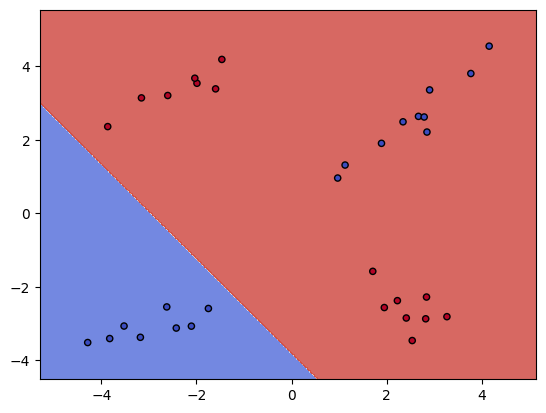

In [70]:
fig, ax = plt.subplots()
X0, X1 = simplest_2_test.x1, simplest_2_test.x2
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=simplest_2_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

<img src='https://miro.medium.com/v2/resize:fit:1400/1*mCwnu5kXot6buL7jeIafqQ.png' class="bg-primary mb-1" align="left" width="800"/>

## Actividad 2

Utilice un kernel no lineal para entrenar otro modelo de SVM, calcule las métricas de clasificación asociadas a este nuevo modelo y visualice los umbrales de clasificación.

Hint: [LINK](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [71]:
# Instanciamos nuestra svm
svm_2 = sklearn.svm.SVC(
    kernel="rbf" # utlizamos un kernel rbf
    )

# Ajustamos el perceptrón con los datos de entrenamiento
svm_2.fit(
    simplest_2_train,
    simplest_2_label_train
)

#Métricas de evaluación
print(sklearn.metrics.classification_report(
    simplest_2_label_test,
    svm_2.predict(simplest_2_test)
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


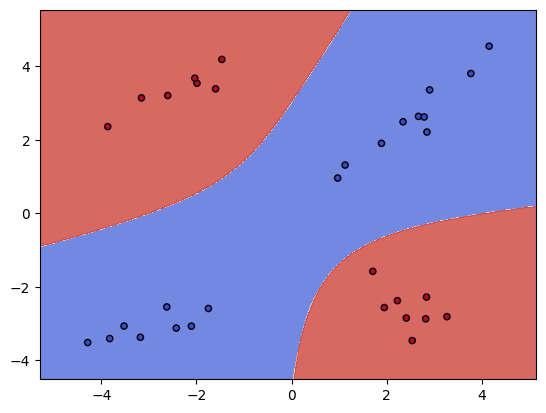

In [72]:
fig, ax = plt.subplots()
X0, X1 = simplest_2_test.x1, simplest_2_test.x2
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm_2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=simplest_2_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

In [73]:
# Instanciamos nuestra svm
svm_2 = sklearn.svm.SVC(
    kernel="poly" # utlizamos un kernel poly
    )

# Ajustamos el perceptrón con los datos de entrenamiento
svm_2.fit(
    simplest_2_train,
    simplest_2_label_train
)

#Métricas de evaluación
print(sklearn.metrics.classification_report(
    simplest_2_label_test,
    svm_2.predict(simplest_2_test)
))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36        18
           1       0.52      1.00      0.68        15

    accuracy                           0.58        33
   macro avg       0.76      0.61      0.52        33
weighted avg       0.78      0.58      0.51        33



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


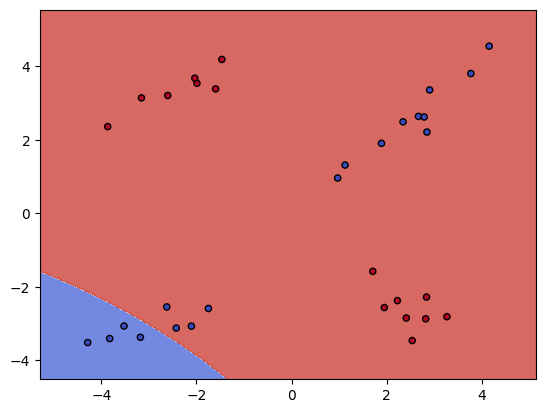

In [74]:
fig, ax = plt.subplots()
X0, X1 = simplest_2_test.x1, simplest_2_test.x2
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm_2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=simplest_2_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

Claramente para este caso la mejor solución es la 'rbf', aun así, debido a la complejidad de poder imaginar la solución en múltiples dimensiones, siempre se recomienda probar los distintos kernels con tal de verificar si la hipótesis es correcta.

# Actividad 3

Típicamente para comparar modelos se utiliza la validación cruzada para poder disminuir el sesgo de selección de datos. Utilice la función `sklearn.model_selection.cross_val_score()` para obtener el rendimiento promedio (debe seleccionar la métrica a comparar) de MLP y SVM sobre el conjunto inicialde datos de cáncer de mama y evalúe qué método se desempeña mejor.


<img src='https://i0.wp.com/sqlrelease.com/wp-content/uploads/2021/07/K-fold-cross-validation-1.jpg?ssl=1' class="bg-primary mb-1" align="right" width="700"/>

In [75]:
mlp_results = sklearn.model_selection.cross_val_score(
    estimator = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), max_iter=2000, random_state=11),
    X = X_train,
    y = Y_train,
    scoring = "accuracy",
    cv = 5,
    verbose=3
)

[CV] END ................................ score: (test=0.987) total time=   1.5s
[CV] END ................................ score: (test=0.987) total time=   1.5s
[CV] END ................................ score: (test=0.961) total time=   3.3s
[CV] END ................................ score: (test=0.974) total time=   1.1s
[CV] END ................................ score: (test=0.947) total time=   1.0s


In [76]:
svm_results = sklearn.model_selection.cross_val_score(
    estimator = sklearn.svm.SVC(random_state=11),
    X = X_train,
    y = Y_train,
    scoring = "accuracy",
    cv = 5,
    verbose = 3
)

[CV] END ................................ score: (test=0.987) total time=   0.0s
[CV] END ................................ score: (test=0.987) total time=   0.0s
[CV] END ................................ score: (test=0.974) total time=   0.0s
[CV] END ................................ score: (test=0.987) total time=   0.0s
[CV] END ................................ score: (test=0.947) total time=   0.0s


In [77]:
print(f"Mean Accuracy MLP: {mlp_results.mean()}")
print(f"Mean Accuracy SVM: {svm_results.mean()}")

Mean Accuracy MLP: 0.9710868079289133
Mean Accuracy SVM: 0.9763499658236501


<ipython-input-78-f3fdb852be91>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


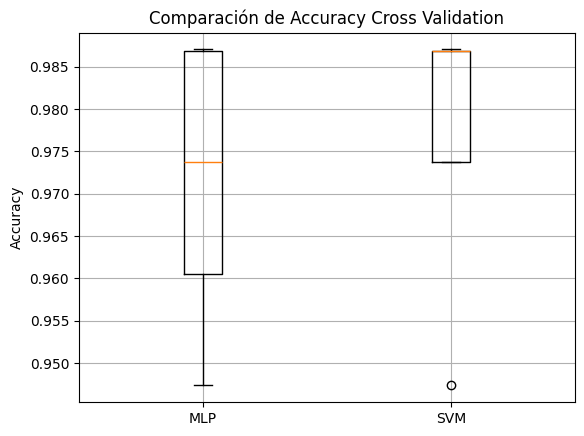

In [78]:
plt.boxplot(
    np.stack([mlp_results, svm_results], axis = 1),
    labels = ["MLP", "SVM"]
    )
plt.ylabel("Accuracy")
plt.grid()
plt.title("Comparación de Accuracy Cross Validation")
plt.show()

Cross Validation es una técnica muy útil pero engañosa. Como se mencionó en la clase, este método prueba distintas particiones dividiendo el conjunto entregado en folds. Los resultados de arriba están divididos en 5 folds (cv), lo que significa que el conjunto de datos entregado fue particionado en 5 posibles conjuntos de prueba, escogiendo en cada iteración (iguales al número de folds) 1 de ellos y dejando el resto de los datos como entrenamiento. En cada caso se evalúa la métrica escogida ("scoring") que permite identificar su valor para las distintas divisiones. En la práctica, estos valores permiten saber la robusteza del modelo, pero pueden ser muy engañosas si solo se presenta el entrenamiento del clasificador con el mejor conjunto pre-escogido.

Cabe destacar, que si se observan los ejemplos de arriba este procedimiento se realizó con el conjunto de entrenamiento (train), habiendo predefinido de forma aleatoria el conjunto de prueba (test) previo a utilizar la función de Cross Validation. Esto se considera como buena práctica dado que evita generar cesgos de entrenamiento, debido a que la data de prueba no fue tocada en ningún caso previo a la evaluación y en consecuencia genera un resultado más “real” inalterado por la selección de datos .Esto deja abierta una nueva discusión, de cómo llamar al conjunto de prueba de la función Cross Validation, el cual en la práctica ya posee un nombre, denominado conjunto de validación (validation), y corresponde al conjunto que se evalúa durante el proceso de entrenamiento para observar el sobreajuste del modelo. En modelos más complejos que toman muchas iteraciones/épocas para entrenar, este conjunto es extremadamente relevante y es utilizado reiterativamente en el proceso de entrenamiento de dichos modelos.


